<a href="https://colab.research.google.com/github/amalzatev/introduction_AI/blob/main/Copia_de_LAB_05_02_MODEL_EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.02 - Model evaluation

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as amalzatev@unal.edu.co ... please wait
using course session ai4eng.v1::open
success!! you are logged in


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [ ]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 16, 18, 74, 99],
       [ 2, 84, 44,  8,  7],
       [ 3, 83, 86, 62, 77],
       [ 4, 21, 70, 72, 73],
       [ 5, 62, 24, 38, 69],
       [ 6, 37, 76, 75, 88],
       [ 7, 84, 35, 47, 67],
       [ 8, 70, 44, 59, 56],
       [ 9, 11, 25, 19, 74],
       [10, 66, 22, 86, 64],
       [11, 67, 36, 34, 47],
       [12, 99, 41, 78, 52],
       [13, 43,  0, 97, 75],
       [14, 50, 81, 41, 68],
       [15, 58, 46, 63, 20],
       [16, 28, 58, 82, 35],
       [17, 46, 90, 79, 61],
       [18, 57,  4,  8, 96],
       [19, 19, 43, 11, 76]])

In [ ]:
ridxs = np.r_[2,4,5]
x[ridxs]


array([2, 4, 5])

In [ ]:
cidxs = np.r_[1,3]
x[:,cidxs]


array([[ 1,  3],
       [16, 74],
       [84,  8],
       [83, 62],
       [21, 72],
       [62, 38],
       [37, 75],
       [84, 47],
       [70, 59],
       [11, 19],
       [66, 86],
       [67, 34],
       [99, 78],
       [43, 97],
       [50, 41],
       [58, 63],
       [28, 82],
       [46, 79],
       [57,  8],
       [19, 11]])

In [ ]:
x[ridxs][:, cidxs]

array([[84,  8],
       [21, 72],
       [62, 38]])

and the dimensions of the array are accessible through `len` and `shape`

In [ ]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [ ]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 16, 18, 74, 99],
       [ 2, 84, 44,  8,  7]])

In [ ]:
x[3:]

array([[ 3, 83, 86, 62, 77],
       [ 4, 21, 70, 72, 73],
       [ 5, 62, 24, 38, 69],
       [ 6, 37, 76, 75, 88],
       [ 7, 84, 35, 47, 67],
       [ 8, 70, 44, 59, 56],
       [ 9, 11, 25, 19, 74],
       [10, 66, 22, 86, 64],
       [11, 67, 36, 34, 47],
       [12, 99, 41, 78, 52],
       [13, 43,  0, 97, 75],
       [14, 50, 81, 41, 68],
       [15, 58, 46, 63, 20],
       [16, 28, 58, 82, 35],
       [17, 46, 90, 79, 61],
       [18, 57,  4,  8, 96],
       [19, 19, 43, 11, 76]])

we can do the same thing with vectors

In [ ]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [ ]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [ ]:
np.random.permutation(v)

array([119, 105, 118, 116, 107, 106, 115, 102, 117, 108, 104, 100, 103,
       113, 112, 110, 101, 109, 111, 114])

or the first natural numbers

In [ ]:
p = np.random.permutation(20)
p

array([18, 15, 10, 13,  4,  0, 12,  7,  6,  2, 16,  5,  8, 14,  9,  1, 17,
        3, 11, 19])

how do you interpret this?

In [ ]:
p[:5]

array([18, 15, 10, 13,  4])

In [ ]:
v[[0]]

array([100])

In [ ]:
v[p[5:]]

array([100, 112, 107, 106, 102, 116, 105, 108, 114, 109, 101, 117, 103,
       111, 119])

In [ ]:
x[[18, 15, 10, 13,  18],3:]

array([[ 8, 96],
       [63, 20],
       [86, 64],
       [97, 75],
       [ 8, 96]])

In [ ]:
x[p[:5]]

array([[18, 57,  4,  8, 96],
       [15, 58, 46, 63, 20],
       [10, 66, 22, 86, 64],
       [13, 43,  0, 97, 75],
       [ 4, 21, 70, 72, 73]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct` 
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [ ]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [ ]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)
len(yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 95 40 70 38 85 47 69]
 [ 2 16 80 19 78 10 20 96]
 [ 3 23 26 27 69 26 63 12]
 [ 4 93 28 64 41 32 48  9]
 [ 5 71 22 59 56 39 99 95]
 [ 6 70 99 16 95 86 75 98]
 [ 7 17 61 11 75 81 31 89]
 [ 8  6 10 52 27 77 48 50]
 [ 9 58 29 19 46 48 52 24]
 [10 54 49 38  2 54 60 20]
 [11 64 96 65 63 86 51 24]
 [12 78 73 19  8 15  3 73]
 [13 20 73 66 49 49  5  2]
 [14 62 87 94 34 82 70 39]
 [15 18 57  0 63 78 45 95]
 [16 39 75 22 83 83  3 75]
 [17 80 60 76 65 53 11 12]
 [18 12 57  9 94 29  8 96]
 [19 73 32 60 53 61 34 38]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


20

In [ ]:
def split_data(X, y, pct):
    
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    
    permutation = np.random.permutation(len(X)) 
    n1_elements = int(len(X)*pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1] 
    y2 = y[permutation_partition_2] 
    return X1, X2, y1, y2

check your solution manually with the following code

In [ ]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 75 39 95 61 88 25 67]
 [ 2 13 72 85 12 46 34 78]
 [ 3 13 56 81 40 41 13 88]
 [ 4 90 31 64 89 29 83 15]
 [ 5 87 89 61 11 62 75 91]
 [ 6 33 11  4  6 33 16 71]
 [ 7 66 62 99 93 99 78 26]
 [ 8 51  8 47 90 31 93 51]
 [ 9  9 38 55 22  3 13 96]
 [10 93 33 75 14 60 82 95]
 [11 85 52 76 96 39 96 80]
 [12 55 31 28 98 55 68 59]
 [13 31 77 95 90 61 49 70]
 [14 81 55 78 49 33  9  2]
 [15 16  7 80  6 68 80 27]
 [16  3 24 45 38 75 28 23]
 [17 38 22 50  8 46 35 96]
 [18 82  2 49 90  9 94 34]
 [19 79 15 68 16 44 83  6]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [ ]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)
Xtr

array([[13, 31, 77, 95, 90, 61, 49, 70],
       [ 2, 13, 72, 85, 12, 46, 34, 78],
       [15, 16,  7, 80,  6, 68, 80, 27],
       [10, 93, 33, 75, 14, 60, 82, 95],
       [11, 85, 52, 76, 96, 39, 96, 80],
       [ 1, 75, 39, 95, 61, 88, 25, 67],
       [ 6, 33, 11,  4,  6, 33, 16, 71],
       [16,  3, 24, 45, 38, 75, 28, 23],
       [ 8, 51,  8, 47, 90, 31, 93, 51],
       [19, 79, 15, 68, 16, 44, 83,  6],
       [ 9,  9, 38, 55, 22,  3, 13, 96],
       [ 4, 90, 31, 64, 89, 29, 83, 15],
       [14, 81, 55, 78, 49, 33,  9,  2],
       [ 7, 66, 62, 99, 93, 99, 78, 26]])

In [ ]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(7157, 7157, 2190, 2190)

In [ ]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[13 31 77 95 90 61 49 70]
 [ 2 13 72 85 12 46 34 78]
 [15 16  7 80  6 68 80 27]
 [10 93 33 75 14 60 82 95]
 [11 85 52 76 96 39 96 80]
 [ 1 75 39 95 61 88 25 67]
 [ 6 33 11  4  6 33 16 71]
 [16  3 24 45 38 75 28 23]
 [ 8 51  8 47 90 31 93 51]
 [19 79 15 68 16 44 83  6]
 [ 9  9 38 55 22  3 13 96]
 [ 4 90 31 64 89 29 83 15]
 [14 81 55 78 49 33  9  2]
 [ 7 66 62 99 93 99 78 26]] 
--
[[17 38 22 50  8 46 35 96]
 [ 5 87 89 61 11 62 75 91]
 [18 82  2 49 90  9 94 34]
 [ 3 13 56 81 40 41 13 88]
 [12 55 31 28 98 55 68 59]
 [ 0  1  2  3  4  5  6  7]] 
--
[113 102 115 110 111 101 106 116 108 119 109 104 114 107] 
--
[117 105 118 103 112 100] 
--


In [ ]:
Xts

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [ ]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

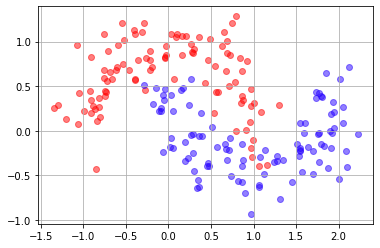

In [ ]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.48705, 0.51295)

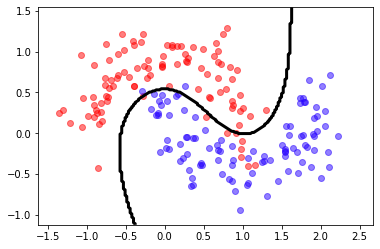

In [ ]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [ ]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [ ]:
def split_data(X, y, pct):
    
      assert len(X)==len(y), "X and y must have the same length"
      assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
      
      permutation = np.random.permutation(len(X)) 
      n1_elements = int(len(X)*pct)
      permutation_partition_1 = permutation[:n1_elements]
      permutation_partition_2 = permutation[n1_elements:]
      X1 = X[permutation_partition_1]
      X2 = X[permutation_partition_2]
      y1 = y[permutation_partition_1] 
      y2 = y[permutation_partition_2] 

      return X1, X2, y1, y2

In [ ]:


def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"
    n = int(round(len(X)/2 - 0.1,0))

    Xtr = X[:n]
    Xts = X[n:]
    ytr = y[:n]
    yts = y[n:] 
    estimator.fit(Xtr,ytr)
    predictions = estimator.predict(Xts)
    
    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [ ]:
print(len(X))
n = round(21/2 - 0.1,0)
int(n)

20


10

In [ ]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [ ]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[6 2 8 7 7 5 0 7 0 1 1 6 8 5 6]


In [ ]:
y_less_than_5 = y<5
print (y_less_than_5)

[False  True False False False False  True False  True  True  True False
 False False False]


and how we can select elements of a vector using a boolean vector of the same length

In [ ]:
y[y_less_than_5]

array([2, 0, 0, 1, 1])

In [ ]:
y[y<5]

array([2, 0, 0, 1, 1])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [ ]:
v = np.random.randint(20, size=15)
v

array([ 8,  1, 13, 11, 11, 18,  0, 10,  0,  0,  9, 11, 13,  1,  1])

In [ ]:
v[y<5]

array([1, 0, 0, 0, 9])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [ ]:
def select_per_class(X, y):
    F = []; T = []
    for i in range(0,len(y)):
      if y[i]==0:
        F. append(i)
      else:
        T.append(i)
    X1 = X[F]
    X2 = X[T]
    return X1, X2

check manually your code

In [ ]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
X[[2,3,4]]

array([[4, 5, 3, 6, 9, 6],
       [0, 3, 5, 3, 5, 3],
       [0, 7, 2, 7, 1, 7]])

In [ ]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [ ]:
def accuracy(y_true, y_pred):
    result = sum((y_true- y_pred) == 0 )/len(y_true)
    return result

In [ ]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
c = (a-b) ==0
c = sum(c)
c/8

0.375

In [ ]:
a = np.array([0, 1, 0,1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,1, 0, 1, 0,])
b = np.array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1])
accuracy(a,b)

0.43478260869565216

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [ ]:

def split_fit_predict(estimator, X, y, train_pct):
    
    def split_data(X, y, pct):
       
    
        assert len(X)==len(y), "X and y must have the same length"
        assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
        
        permutation = np.random.permutation(len(X)) 
        n1_elements = int(len(X)*pct)
        permutation_partition_1 = permutation[:n1_elements]
        permutation_partition_2 = permutation[n1_elements:]
        X1 = X[permutation_partition_1]
        X2 = X[permutation_partition_2]
        y1 = y[permutation_partition_1] 
        y2 = y[permutation_partition_2] 

        return X1, X2, y1, y2
    
    def accuracy(y_true, y_pred):
        result = sum((y_true- y_pred) == 0 )/len(y_true)
        return result

    Xtr, Xts, ytr, yts = split_data(X, y, train_pct)
    
    estimator.fit(Xtr,ytr)

    preds_ts = estimator.predict(Xts)
    return estimator, Xts, yts, accuracy(yts, preds_ts)
        
        

In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), array([[ 0.61730504, -0.32746701],
        [ 1.2456255 , -0.58513844],
        [ 1.11300409, -0.75402462],
        [ 0.31058425, -0.18638747],
        [-0.91577081,  0.57613169],
        [-0.94381643,  0.58172519],
        [ 0.38484983, -0.14899559],
        [ 0.42841449,  0.57076938],
        [ 2.09338593, -0.09729678],
        [ 0.044438  ,  1.22095023]]), array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), 1.0)

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_05");
